In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Cement_data.csv')

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

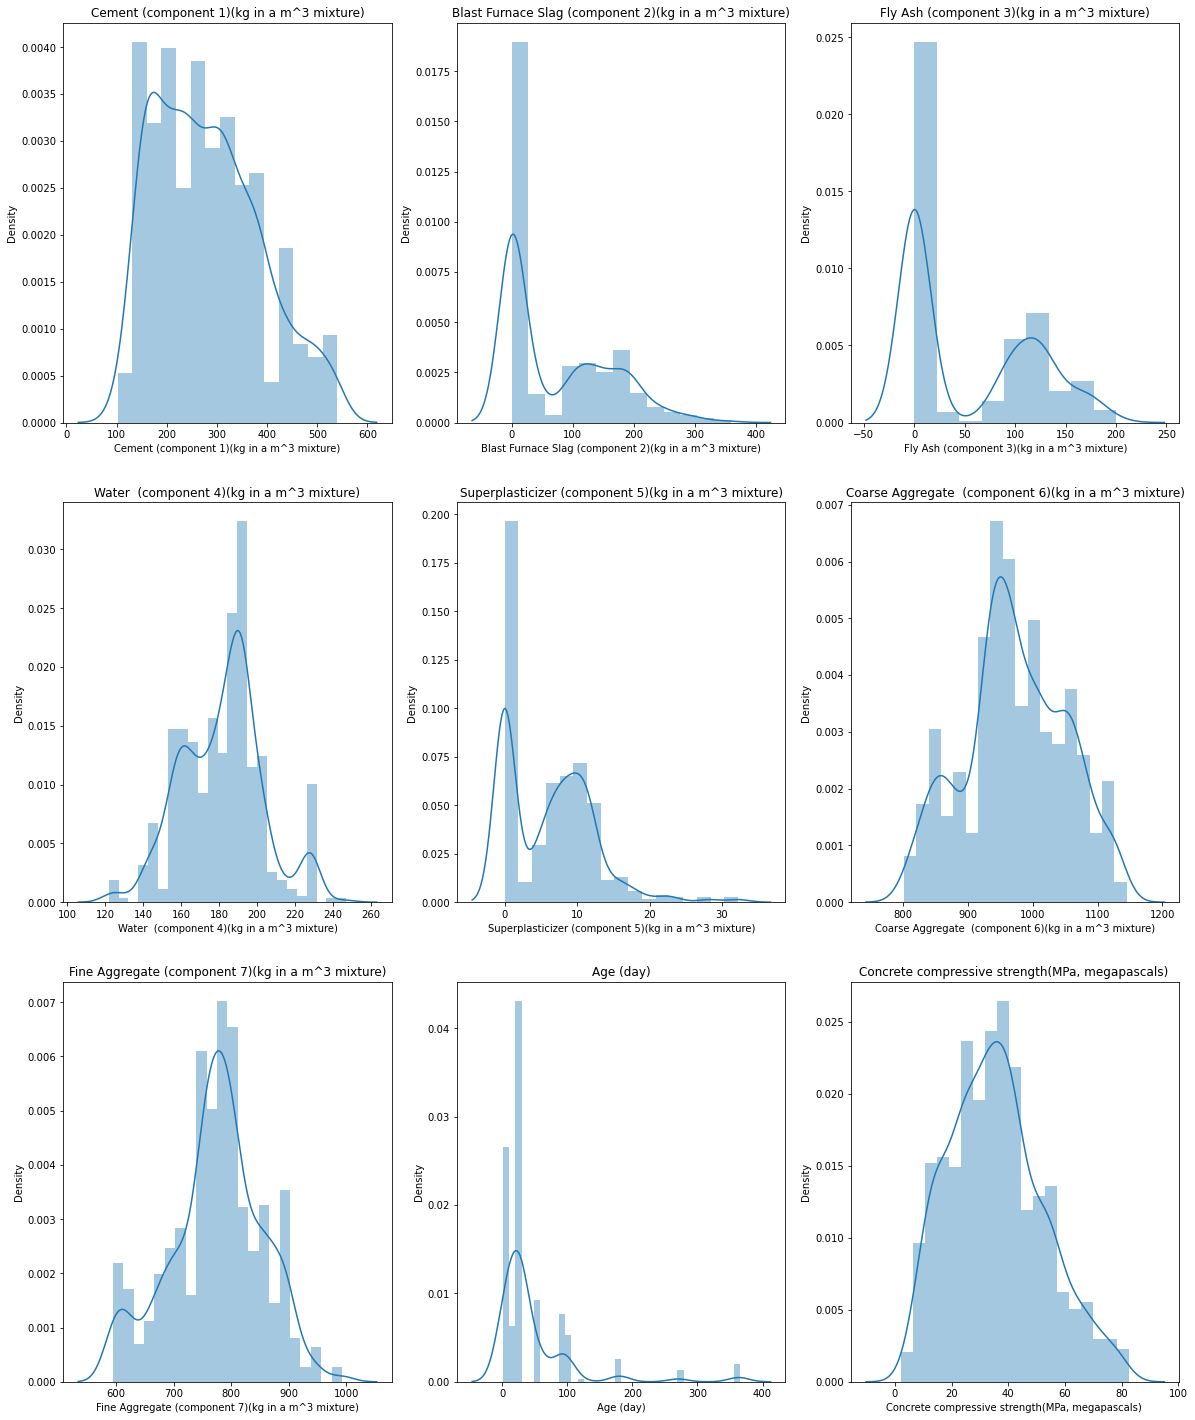

In [11]:
plt.figure(figsize=(20,25))
k=1
for i in df.columns:
    plt.subplot(3,3,k)
    sns.distplot(df[i])
    plt.title(i)
    k=k+1
plt.show()

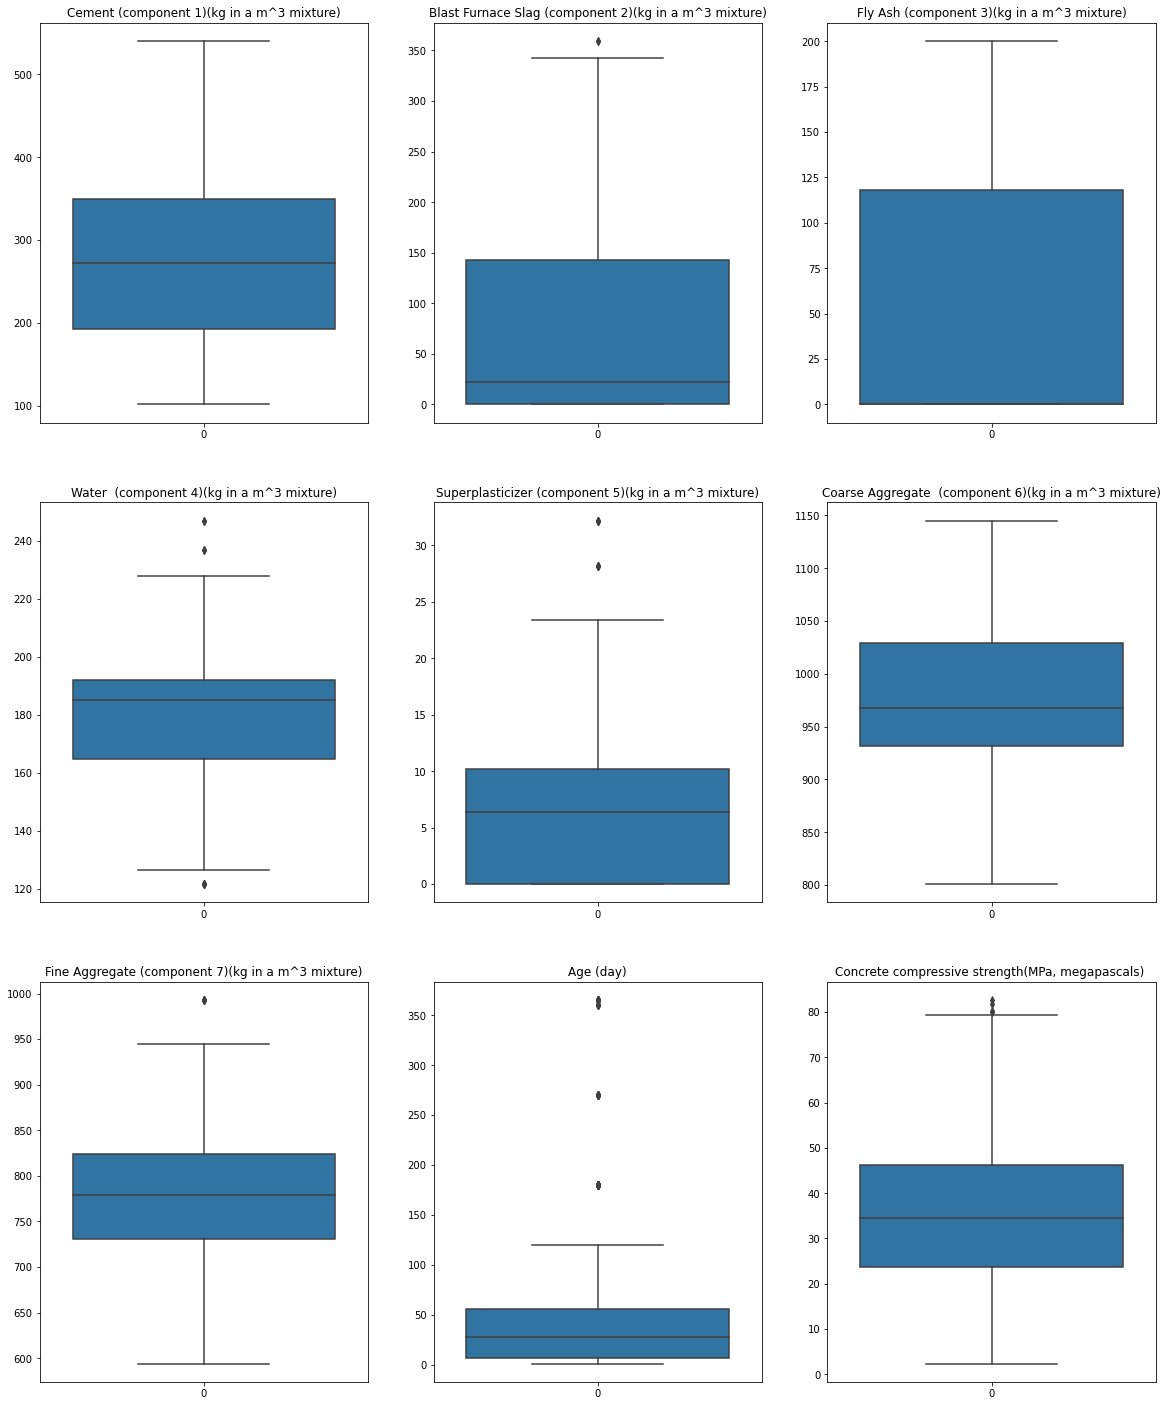

In [13]:
plt.figure(figsize=(20,25))
count=1
for i in df.columns:
    plt.subplot(3,3,count)
    sns.boxplot(df[i])
    plt.title(i)
    count=count+1
plt.show()
    

## REMOVING OUTLIERS

In [14]:
def remove_outliers(data,col):
    q1=np.percentile(data[col], 25)
    q3=np.percentile(data[col], 75)
    iqr=q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[col]<=upper_bound) & (data[col]>=lower_bound)]

In [17]:
for i in df.columns:
    df1=remove_outliers(df,i)

In [19]:
df1.reset_index(drop=True,inplace=True)

In [20]:
df1

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
3,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
...,...,...,...,...,...,...,...,...,...
1021,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1022,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1023,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1024,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [21]:
X=df1.iloc[:,:-1]

In [22]:
y=df1.iloc[:,-1]

In [25]:
from sklearn.preprocessing import StandardScaler

In [69]:
std=StandardScaler()

In [28]:
X_trans=std.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [31]:
models={'Simple_Linear_Regressor':LinearRegression(),'Lasso':Lasso(),'Ridge':Ridge(),
        'Random_Forest_Regressor':RandomForestRegressor(),'Gradiet_Boosting_Regressor':GradientBoostingRegressor(),
       'KNN':KNeighborsRegressor()}

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X_trans,y,test_size=0.30,random_state=30)

In [33]:
from sklearn.metrics import r2_score

In [35]:
for i in range(len(models)):
    model=list(models.values())[i]
    model_name=list(models.keys())[i]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(model_name, " with accuracy ",r2_score(y_test,y_pred))

Simple_Linear_Regressor  with accuracy  0.6226681517982923
Lasso  with accuracy  0.5532219266119063
Ridge  with accuracy  0.6221803370401764
Random_Forest_Regressor  with accuracy  0.9071833219362926
Gradiet_Boosting_Regressor  with accuracy  0.8904119704592667
KNN  with accuracy  0.7423131270503442


## Lets perform Hyper parameter tuning to increase the accuracy of Random forest Regressor

In [37]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


In [38]:
from sklearn.model_selection import GridSearchCV

In [40]:
gsv=GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [41]:
gsv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [42]:
best_params = gsv.best_params_

In [43]:
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [44]:
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

In [45]:
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [46]:
y_pred1 = best_rf_model.predict(X_test)

In [47]:
r2_score(y_test,y_pred1)

0.9089598003568475

In [53]:
import pickle

In [56]:
with open('best_model.pkl','wb') as file_obj:
            pickle.dump(best_rf_model,file_obj)

In [70]:
with open('transformation_model.pkl','wb') as trans:
    pickle.dump(std,trans)

In [57]:
## TIME FOR PREDICTION

In [71]:
with open('best_model.pkl','rb') as file_obj:
    model11 = pickle.load(file_obj)

In [72]:
with open('transformation_model.pkl','rb') as john:
    prepro = pickle.load(john)

In [73]:
model11

RandomForestRegressor(n_estimators=200, random_state=42)

In [74]:
prepro

StandardScaler()

In [79]:
input1=[[540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28]]
prediction_data=prepro.fit_transform(input1)

In [80]:
new_pred=model11.predict(prediction_data)

In [81]:
new_pred

array([43.30801708])